In [1]:
import modules.calc_latency_distance_speed as calc
import modules.lib_process_data_to_mat as plib
import modules.lib_plot_mouse_trajectory as pltlib
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import modules.lib_plot_learning_stats as ls
from modules.config import ROOT_DIR

# Hole Check Density

In [5]:
#import trial data
habit1_wt = [plib.TrialData() for i in range(7)] #wild type mice during the first habituation trial
habit1_wt[0].Load('2023-07-07', '86', 'Habituation 1')
habit1_wt[1].Load('2023-07-07', '87', 'Habituation 1')
habit1_wt[2].Load('2023-07-07', '89', 'Habituation 1')
habit1_wt[3].Load('2023-07-07', '90', 'Habituation 1')
habit1_wt[4].Load('2023-08-15', '95', 'Habituation 1')
habit1_wt[5].Load('2023-08-15', '96', 'Habituation 1')
habit1_wt[6].Load('2023-08-15', '97', 'Habituation 1')

habit1_ko = [plib.TrialData() for i in range(7)] #KO mice during habit 1
habit1_ko[0].Load('2023-07-07', '85', 'Habituation 1')
habit1_ko[1].Load('2023-07-07', '88', 'Habituation 1')
habit1_ko[2].Load('2023-08-15', '91', 'Habituation 1')
habit1_ko[3].Load('2023-08-15', '92', 'Habituation 1')
habit1_ko[4].Load('2023-08-15', '93', 'Habituation 1')
habit1_ko[5].Load('2023-08-15', '94', 'Habituation 1')
habit1_ko[6].Load('2023-08-15', '98', 'Habituation 1')

probe_wt = [plib.TrialData() for i in range(7)] #WT mice during the probe trial after training
probe_wt[0].Load('2023-07-07', '86', 'Probe')
probe_wt[1].Load('2023-07-07', '87', 'Probe')
probe_wt[2].Load('2023-07-07', '89', 'Probe')
probe_wt[3].Load('2023-07-07', '90', 'Probe')
probe_wt[4].Load('2023-08-15', '95', 'Probe')
probe_wt[5].Load('2023-08-15', '96', 'Probe')
probe_wt[6].Load('2023-08-15', '97', 'Probe')

probe_ko = [plib.TrialData() for i in range(7)] #KO mice after training
probe_ko[0].Load('2023-07-07', '85', 'Probe')
probe_ko[1].Load('2023-07-07', '88', 'Probe')
probe_ko[2].Load('2023-08-15', '91', 'Probe')
probe_ko[3].Load('2023-08-15', '92', 'Probe')
probe_ko[4].Load('2023-08-15', '93', 'Probe')
probe_ko[5].Load('2023-08-15', '94', 'Probe')
probe_ko[6].Load('2023-08-15', '98', 'Probe')

In [6]:
#calculate hole check density
def get_hole_check_density(data_list):
    density = []
    for i in data_list:
        hole_check_no = len(i.k_hole_checks)
        distance = calc.calc_distance(i.r_center)
        hole_check_density = hole_check_no/distance #divide total number of hole checks by the total distance travelled to get density
        density.append(hole_check_density)
    return density

hcd_early_wt = get_hole_check_density(habit1_wt)
hcd_early_ko = get_hole_check_density(habit1_ko)
hcd_late_wt = get_hole_check_density(probe_wt)
hcd_late_ko = get_hole_check_density(probe_ko)

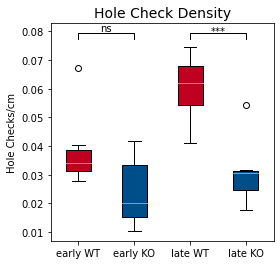

In [6]:
#plot the data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
bplot1 = ax.boxplot([hcd_early_wt,hcd_early_ko, hcd_late_wt, hcd_late_ko], patch_artist=True, showfliers = True)
plt.setp(ax, xticklabels=['early WT', 'early KO', 'late WT', 'late KO'])
colors = ['#c00021', '#004e89', '#c00021', '#004e89']
for patch, color in zip(bplot1['boxes'], colors):
      patch.set_facecolor(color)
ax.set_title('Hole Check Density', size=14)
ax.set_ylabel('Hole Checks/cm')

#annotate with significance markers
x1, x2 = 1, 2
y, h, col = max(hcd_early_wt) + 0.01, 0.002, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)
x1, x2 = 3, 4
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h-0.001, "***", ha='center', va='bottom', color=col)

#plt.savefig(ROOT_DIR+'/figures/Boxplot_ATRX_HoleCheckDensity', dpi=600, bbox_inches='tight', pad_inches = 0)
        
plt.show()

In [7]:
#significance tests between hole check density groups
t, p = stats.ttest_ind(hcd_early_wt, hcd_early_ko)
if p < 0.05:
    print('Hole Check Density between WT and KO during early training is significant at p = %s'%(round(p, 6)))
else: 
    print('Hole Check Density between WT and KO during early training is NOT significant at p = %s'%(round(p, 6)))
print('T-Value: t = %s'%(round(t, 6)))
    
t, p = stats.ttest_ind(hcd_late_wt, hcd_late_ko)
if p < 0.05:
    print('Hole Check Density between WT and KO during late training is significant at p = %s'%(round(p, 6)))
else: 
    print('Hole Check Density between WT and KO during late training is NOT significant at p = %s'%(round(p, 6)))
print('T-Value: t = %s'%(round(t, 6)))

Hole Check Density between WT and KO during early training is NOT significant at p = 0.058208
T-Value: t = 2.093547
Hole Check Density between WT and KO during late training is significant at p = 0.000544
T-Value: t = 4.66763


## Example trajectories showing hole checks

WT Mouse 87 Trial Probe


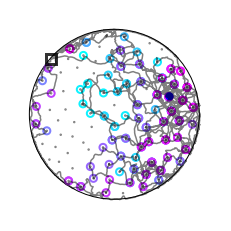

KO Mouse 93 Trial Probe


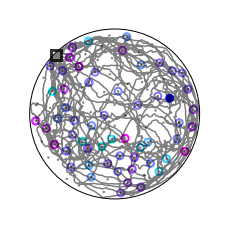

In [11]:
#example trajectories showing hole check density differences. Trajectory only shows first 5 minutes
exp = plib.TrialData()
exp.Load('2023-07-07', '87', 'Probe')
print('WT Mouse %s Trial %s'%(exp.mouse_number, exp.trial))
pltlib.plot_hole_checks(exp, crop_at_target=False, time_limit = '5min', savefig=False)
exp.Load('2023-08-15', '93', 'Probe')
print('KO Mouse %s Trial %s'%(exp.mouse_number, exp.trial))
pltlib.plot_hole_checks(exp, crop_at_target=False, time_limit = '5min', savefig=False)

# Search Bias

In [15]:
reverse_wt = [plib.TrialData() for i in range(7)]
reverse_wt[0].Load('2023-07-07', '86', 'Reverse')
reverse_wt[1].Load('2023-07-07', '87', 'Reverse')
reverse_wt[2].Load('2023-07-07', '89', 'Reverse')
reverse_wt[3].Load('2023-07-07', '90', 'Reverse')
reverse_wt[4].Load('2023-08-15', '95', 'Reverse')
reverse_wt[5].Load('2023-08-15', '96', 'Reverse')
reverse_wt[6].Load('2023-08-15', '97', 'Reverse')

reverse_ko = [plib.TrialData() for i in range(7)]
reverse_ko[0].Load('2023-07-07', '85', 'Reverse')
reverse_ko[1].Load('2023-07-07', '88', 'Reverse')
reverse_ko[2].Load('2023-08-15', '91', 'Reverse')
reverse_ko[3].Load('2023-08-15', '92', 'Reverse')
reverse_ko[4].Load('2023-08-15', '93', 'Reverse')
reverse_ko[5].Load('2023-08-15', '94', 'Reverse')
reverse_ko[6].Load('2023-08-15', '98', 'Reverse')

def get_dwell_dict(trial_list):
    dwell_dict = {}
    for exp in trial_list:
        d = calc.compare_target_dwell(exp, exp.target, time_limit = '2min', radius = 15.)
        dwell_dict[exp.mouse_number] = d
    df = pd.DataFrame(dwell_dict)
    return df

dwell_probe_wt = get_dwell_dict(probe_wt)
dwell_probe_ko = get_dwell_dict(probe_ko)
dwell_reverse_wt = get_dwell_dict(reverse_wt)
dwell_reverse_ko = get_dwell_dict(reverse_ko)

frames = [dwell_probe_wt, dwell_probe_ko]
df_dwell_probe = pd.concat(frames, axis=1)

frames = [dwell_reverse_wt, dwell_reverse_ko]
df_dwell_reverse = pd.concat(frames, axis=1)

## Raw search bias data
0 = target quadrant, radius = 15cm, time = 2 minutes

In [9]:
df_dwell_probe

,86,87,89,90,95,96,97,85,88,91,92,93,94,98
0,14.038,21.498,12.956,14.480,18.09,0.000,12.956,2.527,17.047,6.420,2.447,9.106,4.654,0.000
1,2.727,6.378,3.289,0.441,11.55,0.081,4.052,10.150,6.939,5.655,6.216,5.013,5.215,0.000
2,0.000,0.000,3.409,0.962,0.00,2.005,3.008,7.140,1.043,1.443,6.097,8.303,0.883,1.484
3,2.005,6.818,2.848,4.292,0.00,1.284,1.163,3.047,7.100,5.894,12.312,6.657,10.309,11.111


In [10]:
df_dwell_reverse

,86,87,89,90,95,96,97,85,88,91,92,93,94,98
0,16.966,22.822,14.198,10.510,7.581,4.092,12.878,1.965,2.085,0.000,4.813,3.089,9.426,2.968
1,2.406,0.762,5.376,2.608,2.728,6.179,4.132,4.250,16.485,1.965,16.524,10.670,9.307,2.367
2,1.123,5.215,1.965,6.617,0.240,5.495,2.366,2.167,7.900,7.381,4.292,10.791,6.458,15.765
3,2.126,4.131,4.574,4.371,7.138,6.739,6.579,8.263,3.931,20.696,1.885,4.091,5.373,3.370


## Probe & Reverse Heatmap Examples

WT Mouse 86 Trial Probe


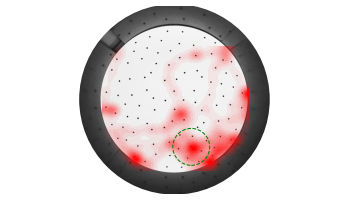

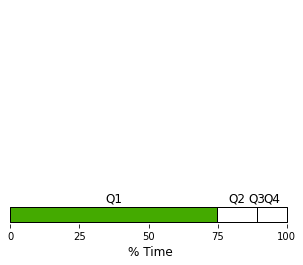

Pooled WT Probe Dwell


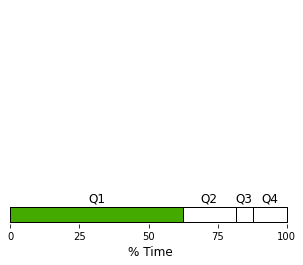

KO Mouse 85 Trial Probe


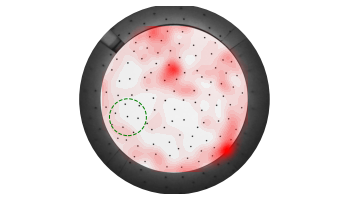

Pooled KO Probe Dwell


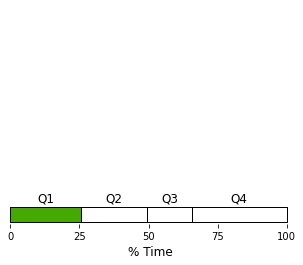

WT Mouse 86 Trial Reverse


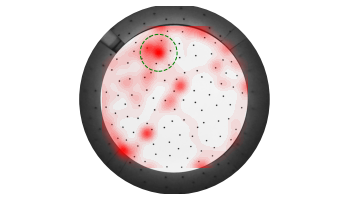

Pooled WT Reverse Dwell


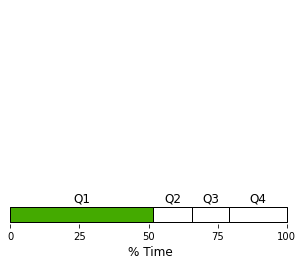

KO Mouse 85 Trial Reverse


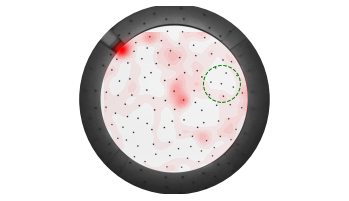

Pooled KO Reverse Dwell


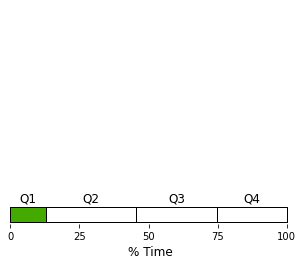

In [21]:
test_pwt = [sum(dwell_probe_wt.loc[i]) for i in range(4)]
test_pko = [sum(dwell_probe_ko.loc[i]) for i in range(4)]
test_rwt = [sum(dwell_reverse_wt.loc[i]) for i in range(4)]
test_rko = [sum(dwell_reverse_ko.loc[i]) for i in range(4)]

print('WT Mouse %s Trial %s'%(probe_wt[0].mouse_number, probe_wt[0].trial))
pltlib.plot_heatmap(probe_wt[0], '2min', False)
ls.plot_percent_bar(df_dwell_probe[probe_wt[0].mouse_number], False)
print('Pooled WT Probe Dwell')
ls.plot_percent_bar(test_pwt, False)

print('KO Mouse %s Trial %s'%(probe_ko[0].mouse_number, probe_ko[0].trial))
pltlib.plot_heatmap(probe_ko[0], '2min', False)
print('Pooled KO Probe Dwell')
ls.plot_percent_bar(test_pko, False)

print('WT Mouse %s Trial %s'%(reverse_wt[0].mouse_number, reverse_wt[0].trial))
pltlib.plot_heatmap(reverse_wt[0], '2min', False)
print('Pooled WT Reverse Dwell')
ls.plot_percent_bar(test_rwt, False)

print('KO Mouse %s Trial %s'%(reverse_ko[0].mouse_number, reverse_ko[0].trial))
pltlib.plot_heatmap(reverse_ko[0], '2min', False)
print('Pooled KO Reverse Dwell')
ls.plot_percent_bar(test_rko, False)

# Early and Late Trajectories

Mouse 90 Trial 1


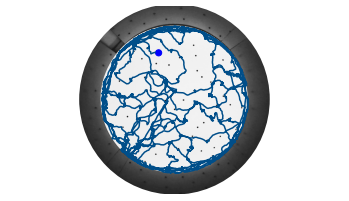

Mouse 90 Trial 15


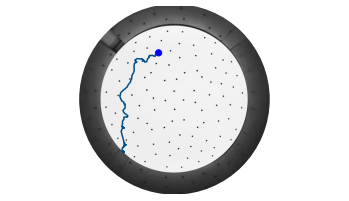

Mouse 85 Trial 1


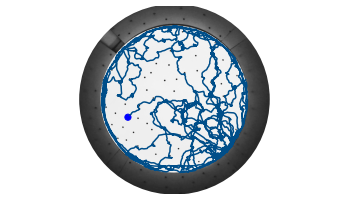

Mouse 85 Trial 15


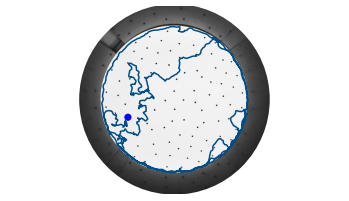

In [4]:
exp = plib.TrialData()
exp.Load('2023-07-07', '90', '1')
print('Mouse %s Trial %s'%(exp.mouse_number, exp.trial))
pltlib.plot_single_traj(exp, show_target=True, cropcoords = True, savefig=False)

exp.Load('2023-07-07', '90', '15')
print('Mouse %s Trial %s'%(exp.mouse_number, exp.trial))
pltlib.plot_single_traj(exp, show_target=True, cropcoords = True, savefig=False)

exp.Load('2023-07-07', '85', '1')
print('Mouse %s Trial %s'%(exp.mouse_number, exp.trial))
pltlib.plot_single_traj(exp, show_target=True, cropcoords = True, savefig=False)

exp.Load('2023-07-07', '85', '15')
print('Mouse %s Trial %s'%(exp.mouse_number, exp.trial))
pltlib.plot_single_traj(exp, show_target=True, cropcoords = True, savefig=False)

# Distance, Latency, Speed Graphs

Trial 1 is  
Trial 2 is  
Trial 3 is  
Trial 4 is **
Trial 5 is  
Trial 6 is  
Trial 7 is *
Trial 8 is *
Trial 9 is  
Trial 10 is  
Trial 11 is **
Trial 12 is  
Trial 13 is  
Trial 14 is  
Trial 15 is  


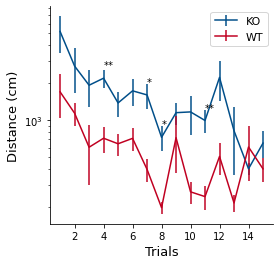

Trial 1 is  
Trial 2 is  
Trial 3 is  
Trial 4 is **
Trial 5 is *
Trial 6 is  
Trial 7 is *
Trial 8 is **
Trial 9 is  
Trial 10 is *
Trial 11 is **
Trial 12 is  
Trial 13 is  
Trial 14 is  
Trial 15 is  


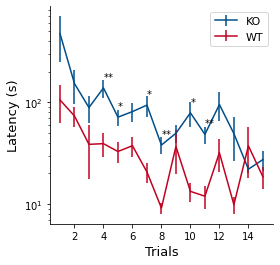

Trial 1 is  
Trial 2 is  
Trial 3 is  
Trial 4 is  
Trial 5 is  
Trial 6 is  
Trial 7 is  
Trial 8 is  
Trial 9 is  
Trial 10 is *
Trial 11 is  
Trial 12 is  
Trial 13 is **
Trial 14 is  
Trial 15 is  


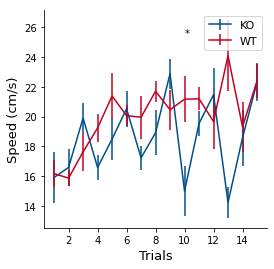

In [4]:
ATRX_trial = calc.iterate_all_trials(['2023-07-07', '2023-08-15'], training_trials_only = True, continuous= False, show_load = False)
KO, WT = ATRX_trial['Distance'][['85','88','91','92','93','94','98']], ATRX_trial['Distance'][['86','87','89','90','95','96','97']]
ls.plot_compare_curves(KO, WT, 'KO', 'WT', "Distance (cm)", show_sig = True, log = True, crop_trial = False, savefig=False)

KO, WT = ATRX_trial['Latency'][['85','88','91','92','93','94','98']], ATRX_trial['Latency'][['86','87','89','90','95','96','97']]
ls.plot_compare_curves(KO, WT, 'KO', 'WT', "Latency (s)", show_sig = True, log = True, crop_trial = False, savefig=False)

KO, WT = ATRX_trial['Speed'][['85','88','91','92','93','94','98']], ATRX_trial['Speed'][['86','87','89','90','95','96','97']]
ls.plot_compare_curves(KO, WT, 'KO', 'WT', "Speed (cm/s)", show_sig = True, log = False, crop_trial = False, savefig=False)

# Distance to target boxplot

In [4]:
ATRX_trial = calc.iterate_all_trials(['2023-07-07', '2023-08-15'], training_trials_only = False, continuous= False, show_load = False)
KO, WT = ATRX_trial['Distance'][['85','88','91','92','93','94','98']], ATRX_trial['Distance'][['86','87','89','90','95','96','97']]



In [26]:
# get first 4 trials and last 4 trials
distance_early_wt = WT[0:4].values.flatten().tolist()
distance_early_ko = KO[0:4].values.flatten().tolist()
distance_late_wt = WT[-4:].values.flatten().tolist()
distance_late_ko = KO[-4:].values.flatten().tolist()

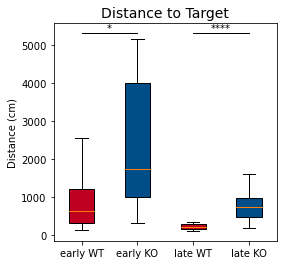

In [31]:
#plot the data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
bplot1 = ax.boxplot([distance_early_wt,distance_early_ko, distance_late_wt, distance_late_ko], patch_artist=True, showfliers = False)
plt.setp(ax, xticklabels=['early WT', 'early KO', 'late WT', 'late KO'])
colors = ['#c00021', '#004e89', '#c00021', '#004e89']
for patch, color in zip(bplot1['boxes'], colors):
      patch.set_facecolor(color)
ax.set_title('Distance to Target', size=14)
ax.set_ylabel('Distance (cm)')

#annotate with significance markers
x1, x2 = 1, 2
y, h, col = max(distance_early_wt) + 0.01, 0.002, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)
x1, x2 = 3, 4
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h-0.001, "****", ha='center', va='bottom', color=col)

#plt.savefig(ROOT_DIR+'/figures/Boxplot_ATRX_Distance', dpi=600, bbox_inches='tight', pad_inches = 0)
        
plt.show()